# Explore Results from Param Exploration (Find a Range that doesn't throw Assertion/BOA Errors)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import copy
import pandas as pd
from scipy import optimize
from matplotlib import pyplot as plt
import pickle
from itertools import cycle
import matplotlib.colors as mcolors
from photochem.utils import stars
import PICASO_Climate_grid_121625 as picaso_grid
import Photochem_grid_121625 as photochem_grid
from picaso.photochem import EquilibriumChemistry
import GraphsKey

/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/Installation&Setup_Instructions/picasofiles/reference
/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/Installation&Setup_Instructions/picasofiles/grp/redcat/trds


## Load PICASO files

In [2]:
filename_picaso ='results/PICASO_climate_updatop_paramext_refineTINT.h5'

with h5py.File(filename_picaso, 'r') as f:
    picaso_data = f
    print(list(picaso_data['completed']))
    print(list(picaso_data['inputs']))
    #print(list(picaso_data['inputs'][0]))

[True, True, True, True, True, True, True, True, True, True, False, True, True, True, False, True]
[array([1.6e+00, 3.5e+00, 5.0e+01, 3.0e-01, 1.0e-02]), array([ 1.6,  3.5, 50. ,  0.3,  1. ]), array([1.6e+00, 3.5e+00, 5.0e+01, 1.0e+01, 1.0e-02]), array([ 1.6,  3.5, 50. , 10. ,  1. ]), array([1.6e+00, 3.5e+00, 7.5e+01, 3.0e-01, 1.0e-02]), array([ 1.6,  3.5, 75. ,  0.3,  1. ]), array([1.6e+00, 3.5e+00, 7.5e+01, 1.0e+01, 1.0e-02]), array([ 1.6,  3.5, 75. , 10. ,  1. ]), array([4.0e+00, 3.5e+00, 5.0e+01, 3.0e-01, 1.0e-02]), array([ 4. ,  3.5, 50. ,  0.3,  1. ]), array([nan, nan, nan, nan, nan]), array([ 4. ,  3.5, 50. , 10. ,  1. ]), array([4.0e+00, 3.5e+00, 7.5e+01, 3.0e-01, 1.0e-02]), array([ 4. ,  3.5, 75. ,  0.3,  1. ]), array([nan, nan, nan, nan, nan]), array([ 4. ,  3.5, 75. , 10. ,  1. ])]


## Explore cases where PICASO did not converge

In [3]:
# Calculate what inputs didn't complete

import itertools

def generate_combinations_with_ranges(input_lists):
  """
  Generates all combinations from a list of inputs, which can be
  lists of values or range objects.

  Args:
    input_lists: A list of iterables (lists or ranges).

  Returns:
    A list of tuples, where each tuple is a combination.
  """
  # itertools.product takes each input list as an argument
  # The '*' unpacks the input_lists into separate arguments
  all_combinations = list(itertools.product(*input_lists))
  return all_combinations

# --- Example Usage ---

# Define your inputs, including standard lists and ranges
# Format for a range should be a range() object: range(start, stop, step)

rad_plan_earth_units = np.array([1.6, 4]) # in units of xEarth radii
log10_planet_metallicity = np.array([3.5]) # in units of solar metallicity
tint_K = np.array([50, 75]) # in Kelvin
semi_major_AU = np.array([0.3, 10]) # in AU 
ctoO_solar = np.array([0.01, 1]) # in units of solar C/O

inputs = [
    rad_plan_earth_units,          
    log10_planet_metallicity,      
    tint_K,
    semi_major_AU,
    ctoO_solar
]

# Generate the combinations
picaso_combinations_list = generate_combinations_with_ranges(inputs)

# Print the results
print(f"Total combinations: {len(picaso_combinations_list)}\n")
print(np.array(picaso_combinations_list))

Total combinations: 16

[[1.6e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02]
 [1.6e+00 3.5e+00 5.0e+01 3.0e-01 1.0e+00]
 [1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e-02]
 [1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02]
 [1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e-02]
 [1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e+00]
 [4.0e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02]
 [4.0e+00 3.5e+00 5.0e+01 3.0e-01 1.0e+00]
 [4.0e+00 3.5e+00 5.0e+01 1.0e+01 1.0e-02]
 [4.0e+00 3.5e+00 5.0e+01 1.0e+01 1.0e+00]
 [4.0e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02]
 [4.0e+00 3.5e+00 7.5e+01 3.0e-01 1.0e+00]
 [4.0e+00 3.5e+00 7.5e+01 1.0e+01 1.0e-02]
 [4.0e+00 3.5e+00 7.5e+01 1.0e+01 1.0e+00]]


[array([1.6e+00, 3.5e+00, 5.0e+01, 3.0e-01, 1.0e-02]), array([ 1.6,  3.5, 50. ,  0.3,  1. ]), array([1.6e+00, 3.5e+00, 5.0e+01, 1.0e+01, 1.0e-02]), array([ 1.6,  3.5, 50. , 10. ,  1. ]), array([1.6e+00, 3.5e+00, 7.5e+01, 3.0e-01, 1.0e-02]), array([ 1.6,  3.5, 75. ,  0.3,  1. ]), array([1.6e+00, 3.5e+00, 7.5e+01, 1.0e+01, 1.0e-02]), array([ 1.6,  3.5, 75. , 10. ,  1. ]), array([4.0e+00, 3.5e+00, 5.0e+01, 3.0e-01, 1.0e-02]), array([ 4. ,  3.5, 50. ,  0.3,  1. ]), array([nan, nan, nan, nan, nan]), array([ 4. ,  3.5, 50. , 10. ,  1. ]), array([4.0e+00, 3.5e+00, 7.5e+01, 3.0e-01, 1.0e-02]), array([ 4. ,  3.5, 75. ,  0.3,  1. ]), array([nan, nan, nan, nan, nan]), array([ 4. ,  3.5, 75. , 10. ,  1. ])]
Inputs of failed PICASO calcultions: [(4.0, 3.5, 50, 10.0, 0.01), (4.0, 3.5, 75, 10.0, 0.01)]
This is an example of inputs: [1.6e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02]
[1.6e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii

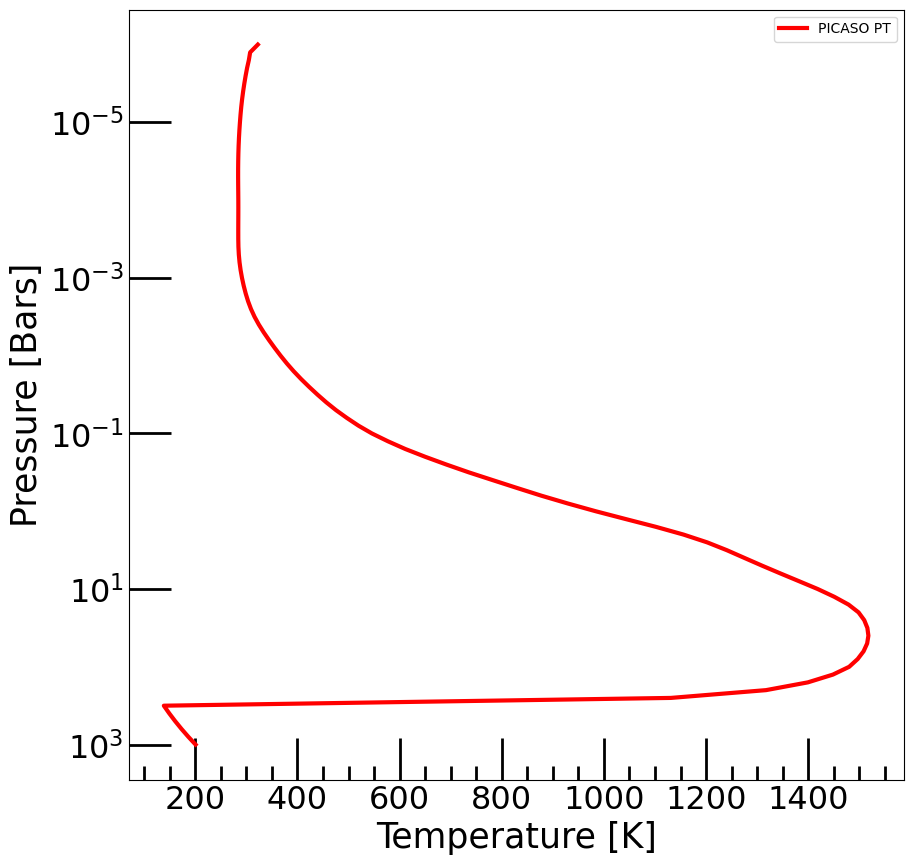

This is an example of inputs: [ 1.6  3.5 50.   0.3  1. ]
[ 1.6  3.5 50.   0.3  1. ]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [ 1.6  3.5 50.   0.3  1. ]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


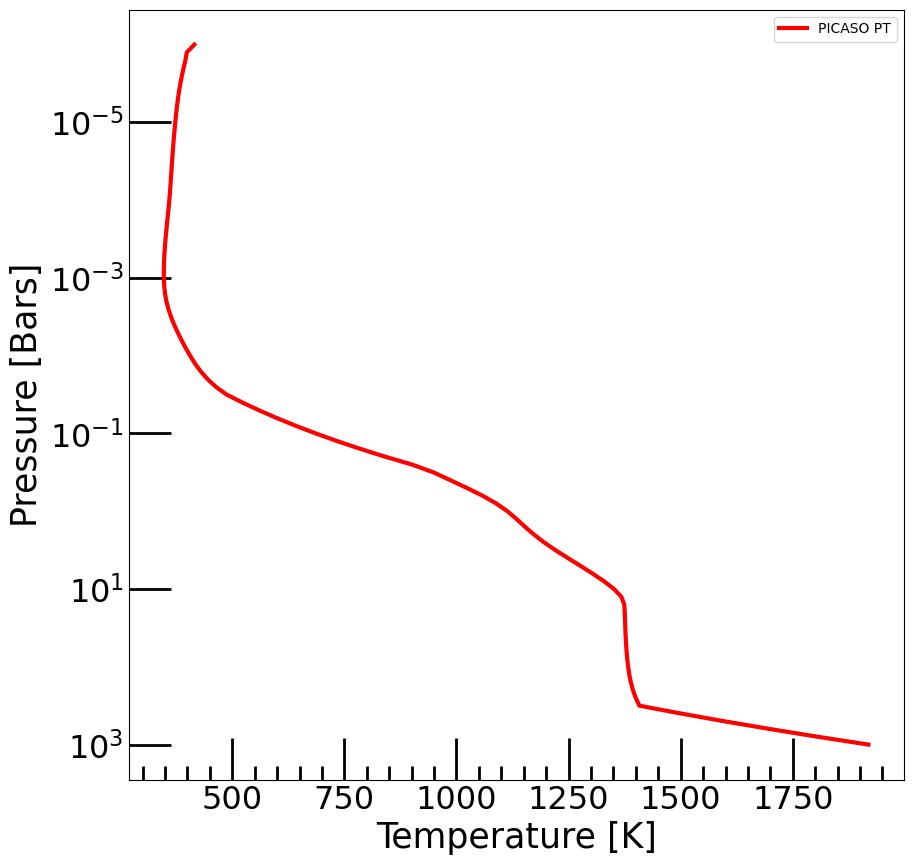

This is an example of inputs: [1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e-02]
[1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e-02]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e-02]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


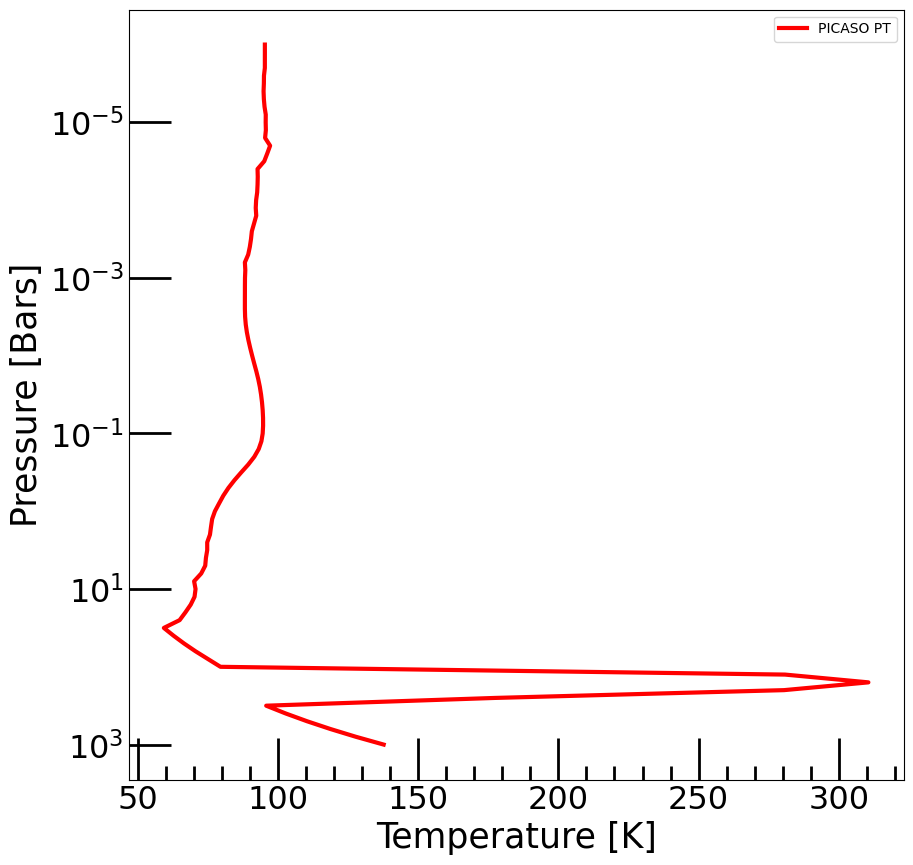

This is an example of inputs: [ 1.6  3.5 50.  10.   1. ]
[ 1.6  3.5 50.  10.   1. ]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [ 1.6  3.5 50.  10.   1. ]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


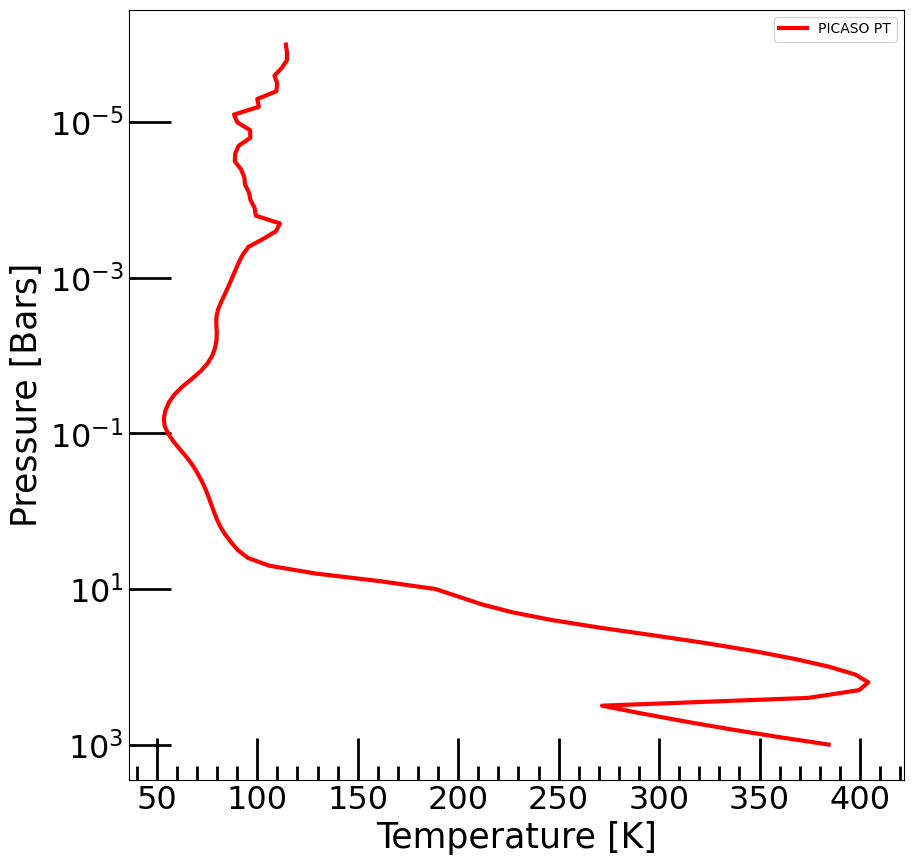

This is an example of inputs: [1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02]
[1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


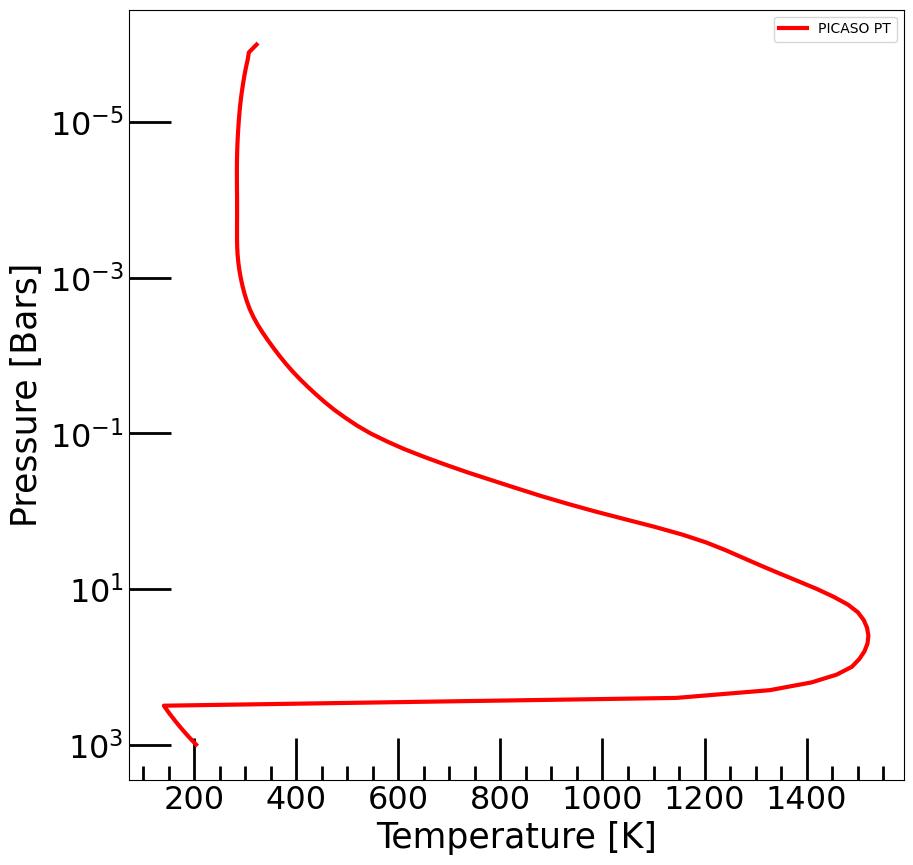

This is an example of inputs: [ 1.6  3.5 75.   0.3  1. ]
[ 1.6  3.5 75.   0.3  1. ]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [ 1.6  3.5 75.   0.3  1. ]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


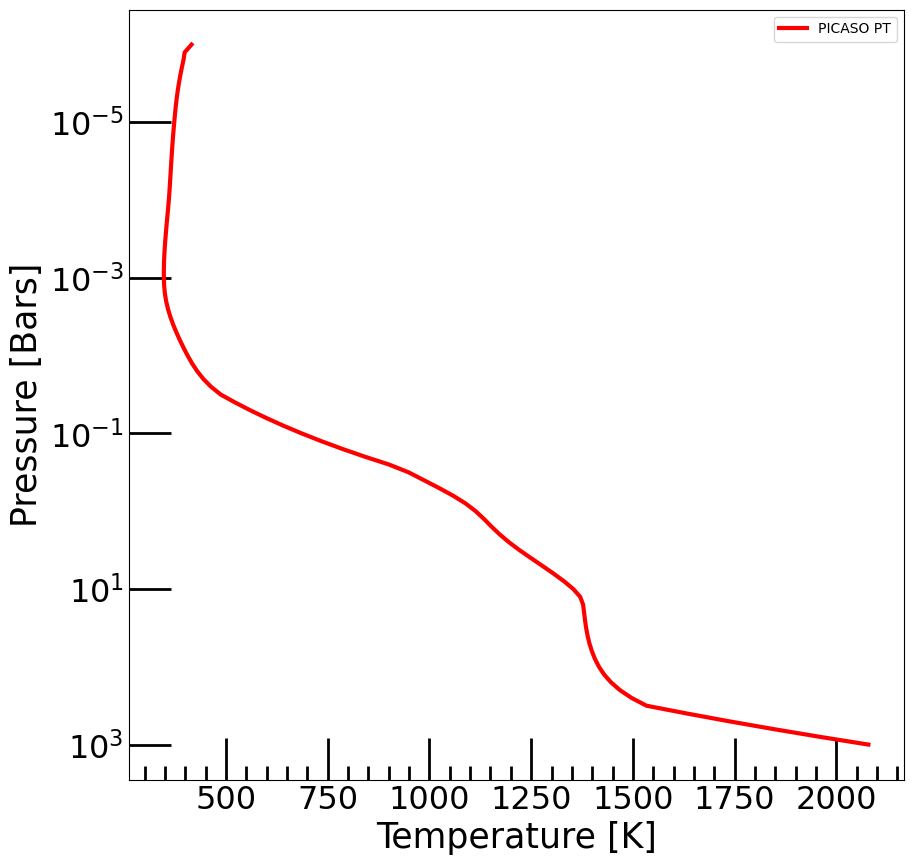

This is an example of inputs: [1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e-02]
[1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e-02]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e-02]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


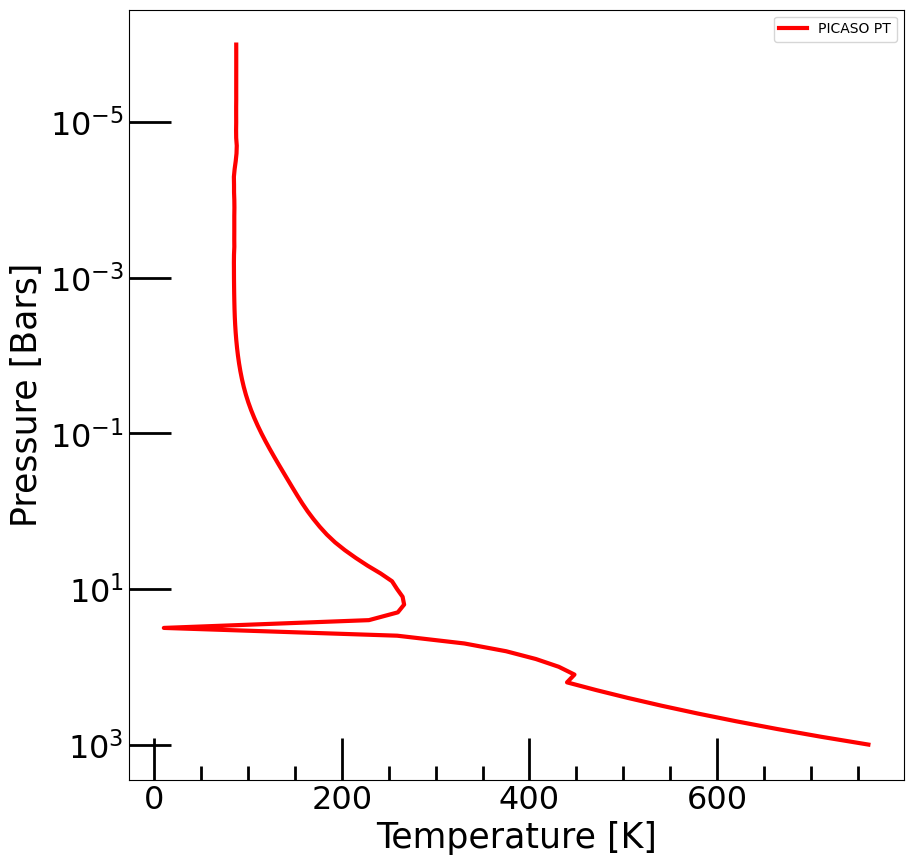

This is an example of inputs: [ 1.6  3.5 75.  10.   1. ]
[ 1.6  3.5 75.  10.   1. ]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [ 1.6  3.5 75.  10.   1. ]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


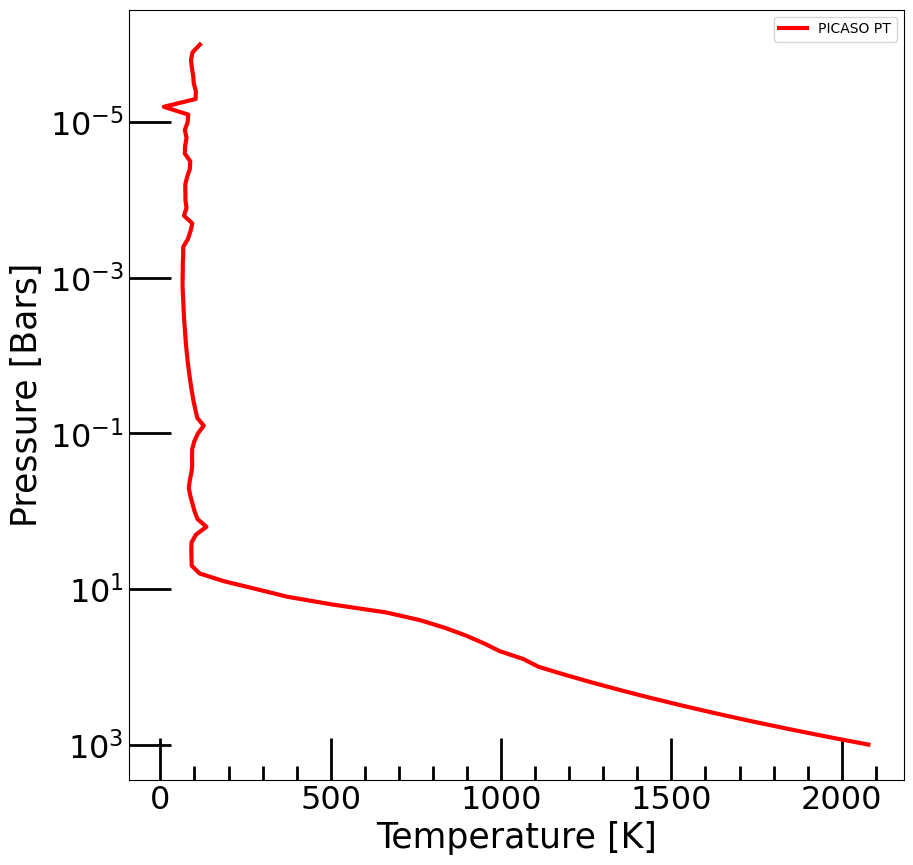

This is an example of inputs: [4.0e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02]
[4.0e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [4.0e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


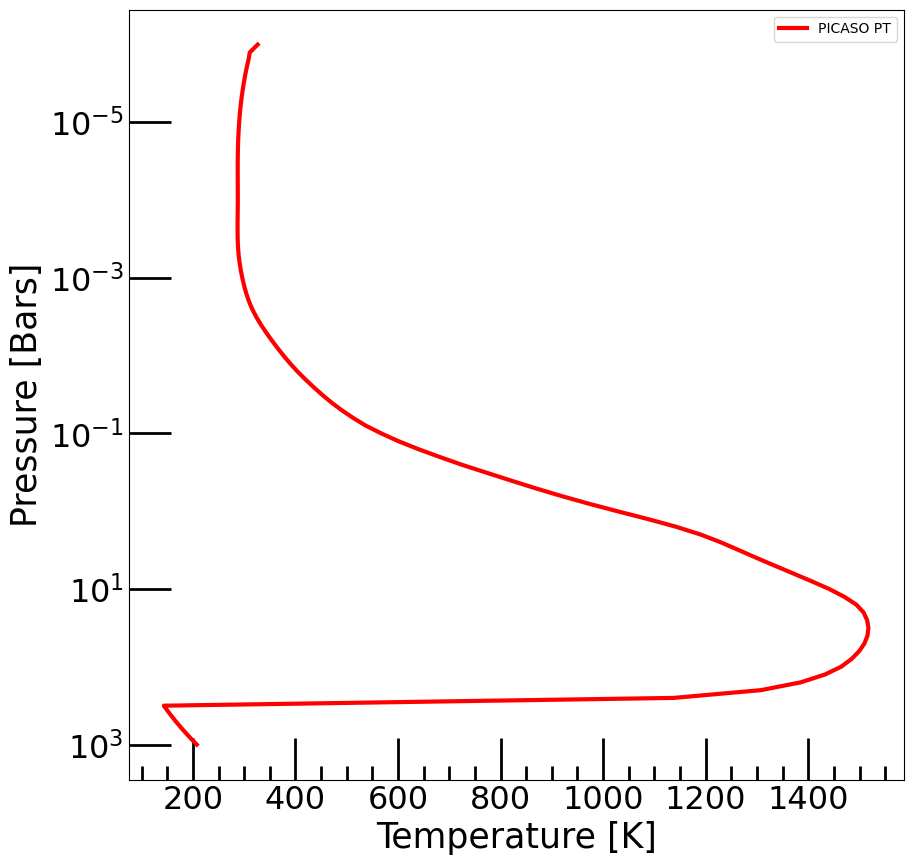

This is an example of inputs: [ 4.   3.5 50.   0.3  1. ]
[ 4.   3.5 50.   0.3  1. ]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [ 4.   3.5 50.   0.3  1. ]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


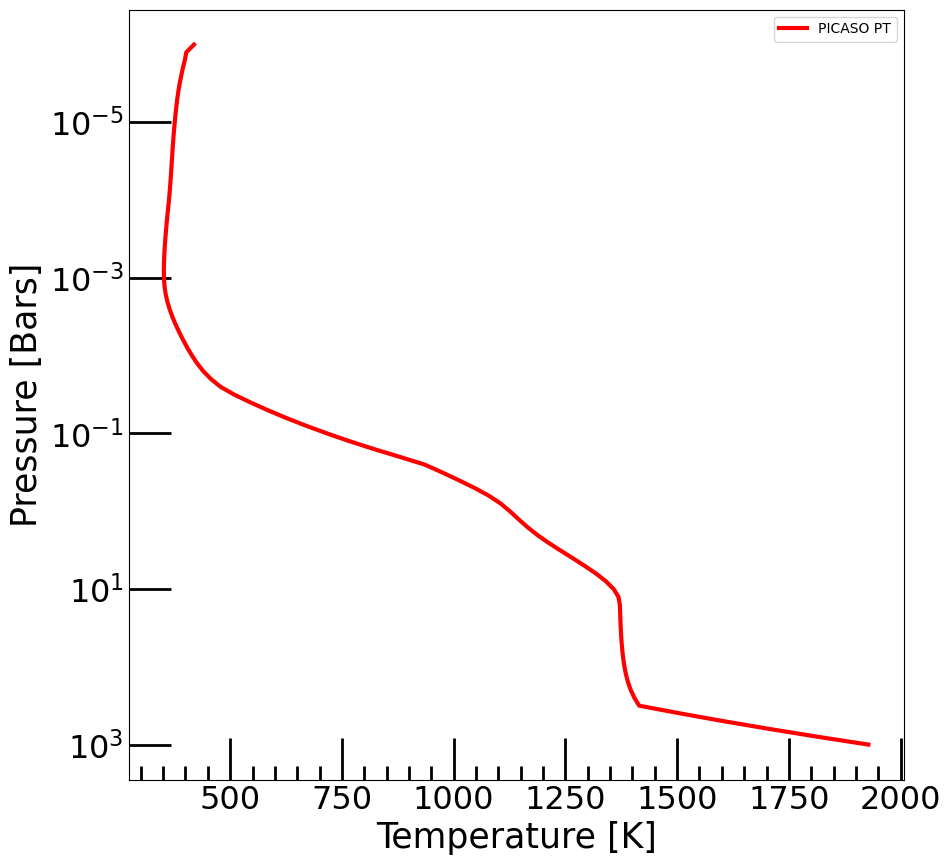

This is an example of inputs: [ 4.   3.5 50.  10.   1. ]
[ 4.   3.5 50.  10.   1. ]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [ 4.   3.5 50.  10.   1. ]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


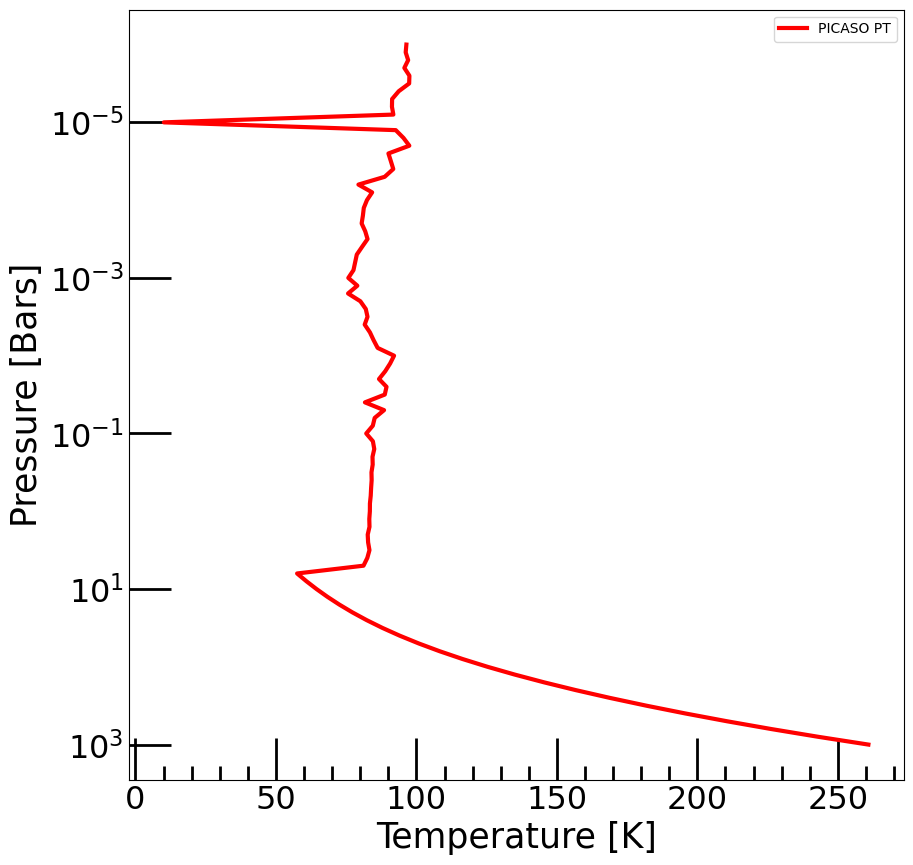

This is an example of inputs: [4.0e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02]
[4.0e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [4.0e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


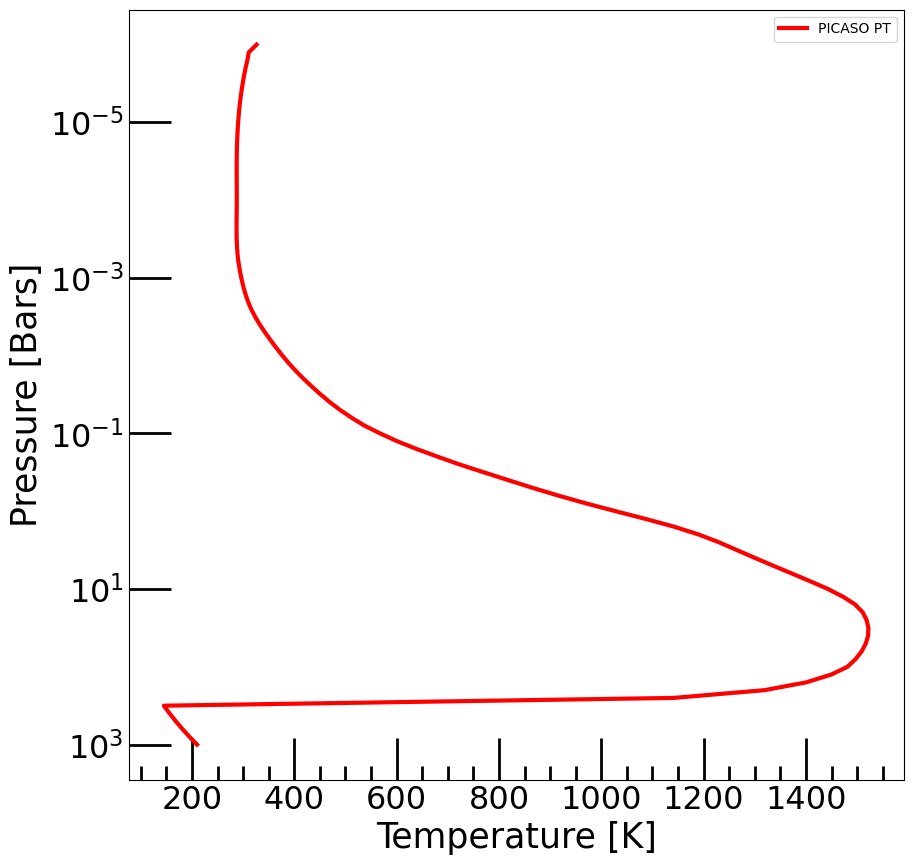

This is an example of inputs: [ 4.   3.5 75.   0.3  1. ]
[ 4.   3.5 75.   0.3  1. ]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [ 4.   3.5 75.   0.3  1. ]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


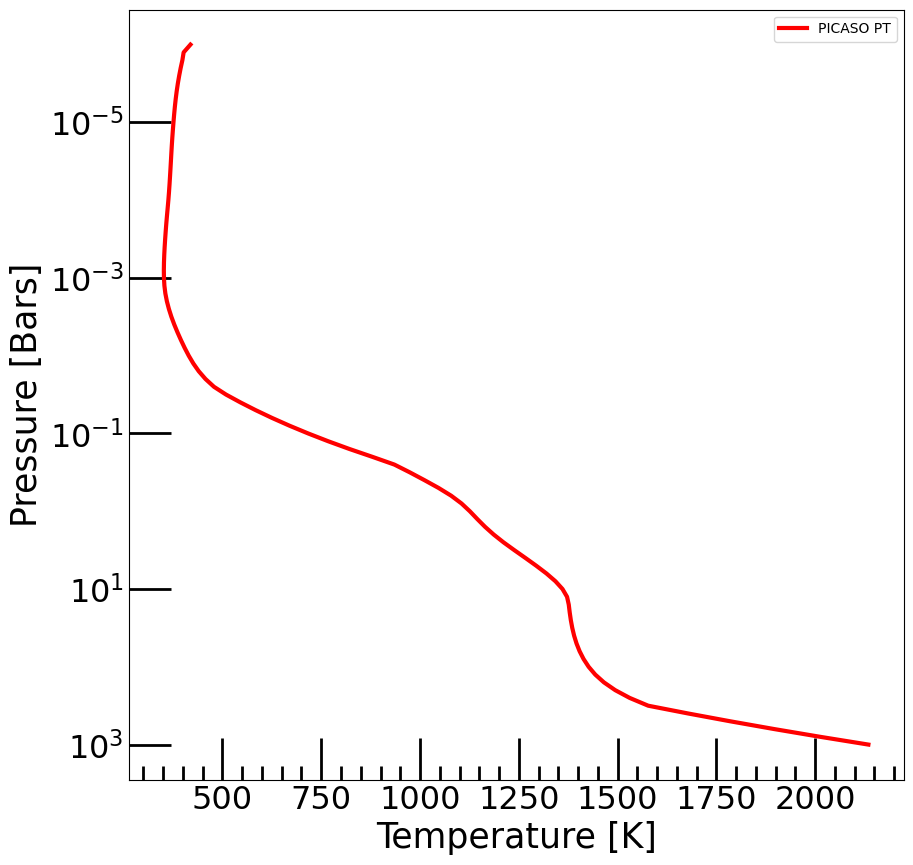

This is an example of inputs: [ 4.   3.5 75.  10.   1. ]
[ 4.   3.5 75.  10.   1. ]
Make sure your inputs are within the following ranges, rad_plan: 1.6 - 4.0 xEarth Radii, planet metallicity: 3.5 - 3.5 xsolar, tint: 50 - 75 K, semi_major: 0.3 - 10.0 AU, ctoO: 0.01 - 1.0
This is the input list: [ 4.   3.5 75.  10.   1. ]
Was able to successfully find your input parameters in the PICASO TP profile grid!
All inputs chosen were directly on the grid!
Does not include Photochemistry extension of PT profile


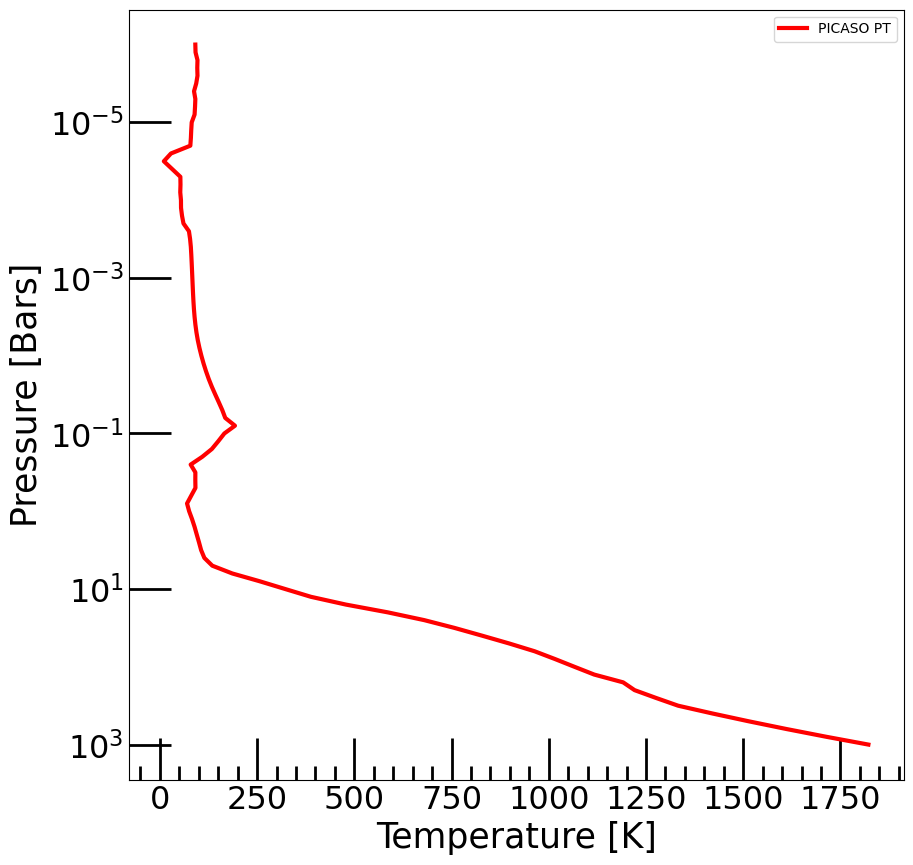

In [4]:
filename_picaso ='results/PICASO_climate_updatop_paramext_refineTINT.h5'
indices_dnf = []

with h5py.File(filename_picaso, 'r') as f:
    picaso_data = f
    #print(len(list(photochem_data['inputs'])))
    print(list(picaso_data['inputs']))
    picaso_completed_list = np.array(list(picaso_data['completed']))

    try:
        indicies_true = np.where(picaso_completed_list)[0]
    except:
        print(f"No results were True, no calculations were completed")

    # Find matching indices
    # Reshape arr2 for broadcasting
    # This ensures a comparison is made for each row in arr1 against all rows in arr2
    arr2 = np.array(list(picaso_data['inputs']))
    arr1 = np.array(picaso_combinations_list)

    # 1. Compare all rows of arr1 to all rows of arr2
    #    Result is a 3D boolean array where:
    #    - the first dimension matches arr1 rows
    #    - the second dimension matches arr2 rows
    #    - the third dimension matches columns
    #    Shape will be (arr1.shape[0], arr2.shape[0], arr1.shape[1]) -> (4, 2, 3)
    comparison = arr1[:, None, :] == arr2[None, :, :]
    
    # 2. Check if all elements in a row comparison are True
    #    Use np.all() along the last axis (axis=2)
    #    Result is a 2D boolean array (4, 2)
    rows_match = np.all(comparison, axis=2)
    
    # 3. Check if any row in arr2 matches the corresponding row in arr1
    #    Use np.any() along the second axis (axis=1)
    #    Result is a 1D boolean array (4,) indicating which rows in arr1 had a match in arr2
    any_match = np.any(rows_match, axis=1)
    
    # 4. Get the indices of the True values in the boolean mask
    #    Use np.where() to return the indices
    matching_indices = np.where(any_match)[0]
    non_matching_indices = np.where(~any_match)[0]

    # 5. Determine what input values were not calculated
    for index in non_matching_indices:
        indices_dnf.append(picaso_combinations_list[index])
    
    #print(f"Indices of matching rows in arr1: {matching_indices}")
    #print(f"Indices of non-matching rows in arr1: {non_matching_indices}")
    print(f"Inputs of failed PICASO calcultions: {indices_dnf}")

    for index in indicies_true:
        inputs = picaso_data['inputs'][index]
        print(f"This is an example of inputs: {inputs}")
        print(inputs)
        GraphsKey.plot_PT(rad_plan=inputs[0], planet_metal=inputs[1], tint=inputs[2], semi_major=inputs[3], ctoO=inputs[4], kzz=None, calc_PT=True, calc_PhotCh=False, PT_filepath='/mnt/c/Users/lily/Documents/NASAUWPostbac/MiniNeptuneGrid26_PostBac/results/PICASO_climate_updatop_paramext_refineTINT.h5')

## Relevant Functions to Check Photochem Results

In [5]:
import os

def Photochem_called(rad_plan=None, log10_planet_metallicity=None, tint=None, semi_major=None, ctoO=None, log_Kzz=None, PIC_PT=None):
    # Planet Parameters
    atoms_names = ['H', 'He', 'N', 'O', 'C'] # We select a subset of the atoms in zahnle_earth.yaml (leave out Cl), remove Sulpher for faster convergence

    # Calculate the Mass of the Planet and Teq
    mass_planet_earth = picaso_grid.mass_from_radius_chen_kipping_2017(R_rearth=rad_plan)
    mass_planet = mass_planet_earth * (5.972e+24) * 1e3 # of planet, but in grams
    radius_planet = rad_plan * (6.371e+6) * 1e2 # of planet but in cm
    solar_zenith_angle = 60 # Used in Tsai et. al. (2023), in degrees
    planet_Teq = picaso_grid.calc_Teq_SUN(distance_AU=semi_major)

    # Dependent constant variables
    if os.path.exists(f'sun_flux_file_{planet_Teq}'):
        stellar_flux_file = f'sun_flux_file_{planet_Teq}'
        print(f"The stellar flux file already exists")
    else:
        wv, F = star_spectrum.solar_spectrum(Teq=planet_Teq, outputfile= f'sun_flux_file_{planet_Teq}')
        stellar_flux_file = f'sun_flux_file_{planet_Teq}'

    pressure = PIC_PT['pressure']
    temperature = PIC_PT['temperature']
    PT_list = np.array([pressure, temperature]) 

    # Test Data - This works fine.
    #with open('out_Sun_5778_initp3bar.pkl', 'rb') as file:
    #    out_reopened = pickle.load(file)
    #    pressure = out_reopened['pressure']
    #    temperature = out_reopened['temperature']
    #PT_list = np.array(pressure), np.array(temperature)
    #convergence_values = np.array([1])

    # Define P-T Profile (convert from PICASO to Photochem)
    P_extended, T_extended = photochem_grid.linear_extrapolate_TP(PT_list[0], PT_list[1]) # Extend the end to bypass BOA Error of mismatching boundary conditions.
    #P = np.flip(np.array(PT_list[0]) * (10**6)).copy()
    #T = np.flip(np.array(PT_list[1])).copy()
    P = np.flip(np.array(P_extended) * (10**6)).copy() # Convert from bars to dynes/cm^2
    T = np.flip(np.array(T_extended)).copy()
    
    # Check if numpy array is sorted (investigating error)
    sorted_P = np.flip(np.sort(P)).copy()
    unsorted_indices = np.where(P != sorted_P)[0]
    
    # Generate reaction & thermodynamic files for gas giants
    photochem_grid.zahnle_rx_and_thermo_files(
    atoms_names=atoms_names,
    rxns_filename='photochem_rxns.yaml',
    thermo_filename='photochem_thermo.yaml',
    remove_reaction_particles=True # For gas giants, we should always leave out reaction particles.
    )

    # Initialize ExoAtmosphereGasGiant
    # Assigns 
    pc = photochem_grid.gasgiants.EvoAtmosphereGasGiant(
        mechanism_file='photochem_rxns.yaml',
        stellar_flux_file=stellar_flux_file,
        planet_mass=mass_planet,
        planet_radius=radius_planet,
        solar_zenith_angle=solar_zenith_angle,
        thermo_file='photochem_thermo.yaml'
    )
    # Adjust convergence parameters:
    pc.var.conv_longdy = 0.03 # converges at 3% (change of mixing ratios over long time)
    pc.gdat.max_total_step = 10000 # assumes convergence after 10,000 steps
    
    pc.gdat.verbose = True # printing
    
    # Define the host star composition
    molfracs_atoms_sun = np.ones(len(pc.gdat.gas.atoms_names))*1e-10 # This is for the Sun
    comp = {
        'H' : 9.21e-01,
        'N' : 6.23e-05,
        'O' : 4.51e-04,
        'C' : 2.48e-04,
        'S' : 1.21e-05,
        'He' : 7.84e-02
    }

    tot = sum(comp.values())
    for key in comp:
        comp[key] /= tot
    for i,atom in enumerate(pc.gdat.gas.atoms_names):
        molfracs_atoms_sun[i] = comp[atom]
    
    pc.gdat.gas.molfracs_atoms_sun = molfracs_atoms_sun

    # Assume a default radius for particles 1e-5cm was default, so we increased the size but think of these in microns
    particle_radius = pc.var.particle_radius
    particle_radius[:,:] = 1e-3 #cm or 10 microns
    pc.var.particle_radius = particle_radius

    # Assumed Kzz (cm^2/s) in Tsai et al. (2023)
    Kzz_zero_grid = np.ones(P.shape[0])
    Kzz = Kzz_zero_grid*(10**log_Kzz) #Note Kzz_fac was meant to be the power of 10 since we are in log10 space

    # Initialize the PT based on chemical equilibrium 
    pc.gdat.BOA_pressure_factor = 3
    pc.initialize_to_climate_equilibrium_PT(P, T, Kzz, 10**log10_planet_metallicity, ctoO)
    
    # Integrate to steady state
    converged = pc.find_steady_state()

    # Check if the model converged after 10,000 steps
    if not converged:
        assert pc.gdat.total_step_counter > pc.gdat.max_total_step - 10
        
    sol_raw = pc.return_atmosphere()
    soleq_raw = pc.return_atmosphere(equilibrium=True)

    # Call the interpolation of the grid 
    sol = photochem_grid.interpolate_photochem_result_to_nlayers(out=sol_raw, nlayers=100)
    soleq = photochem_grid.interpolate_photochem_result_to_nlayers(out=soleq_raw, nlayers=100)
    #convergence_values = np.array([convergence_values[0] for _ in range(len(sol['pressure']))])
    #converged = np.array([converged for _ in range(len(sol['pressure']))])

    # Print out the lengths of arrays: Save the size of the grid for future reference.

    print(f"This is for the input value of planet radius:{rad_plan}, metal:{float(log10_planet_metallicity)}, tint:{tint}, semi major:{semi_major}, ctoO: {ctoO}, log_Kzz: {log_Kzz}")
    
    #for key, value in sol.items():
    #    if isinstance(value, np.ndarray):  # Check if the value is a list (or array)
    #        print(f"The array for sol's '{key}' has a length of: {len(value)}")
    #    else:
    #        print(f"The value for sol's '{key}' is not an array.")

    #for key, value in soleq.items():
    #    if isinstance(value, np.ndarray):  # Check if the value is a list (or array)
    #        print(f"The array for soleq's '{key}' has a length of: {len(value)}, Length of pressure: {len(P)}")
    #    else:
    #        print(f"The value for soleq's '{key}' is not an array.")

    # Add nan's to fit the grid if underestimated, and make sure list goes from largest to smallest.
    

    return sol, soleq, pc

In [8]:
# Calculate what inputs didn't complete

import itertools

def generate_combinations_with_ranges(input_lists):
  """
  Generates all combinations from a list of inputs, which can be
  lists of values or range objects.

  Args:
    input_lists: A list of iterables (lists or ranges).

  Returns:
    A list of tuples, where each tuple is a combination.
  """
  # itertools.product takes each input list as an argument
  # The '*' unpacks the input_lists into separate arguments
  all_combinations = list(itertools.product(*input_lists))
  return all_combinations

# --- Example Usage ---

# Define your inputs, including standard lists and ranges
# Format for a range should be a range() object: range(start, stop, step)

rad_plan_earth_units = np.array([1.6, 4]) # in units of xEarth radii
log10_planet_metallicity = np.array([3.5]) # in units of solar metallicity
tint_K = np.array([50, 75]) # in Kelvin
semi_major_AU = np.array([0.3, 10]) # in AU 
ctoO_solar = np.array([0.01, 1]) # in units of solar C/O
log_Kzz = np.array([5, 9]) # In units of logspace (so 5 means 10^5 cm^2/s)

inputs = [
    rad_plan_earth_units,          
    log10_planet_metallicity,      
    tint_K,
    semi_major_AU,
    ctoO_solar,
    log_Kzz
]

# Generate the combinations
combinations_list = generate_combinations_with_ranges(inputs)

# Print the results
print(f"Total combinations: {len(combinations_list)}\n")
print(np.array(combinations_list))

Total combinations: 32

[[1.6e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02 5.0e+00]
 [1.6e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02 9.0e+00]
 [1.6e+00 3.5e+00 5.0e+01 3.0e-01 1.0e+00 5.0e+00]
 [1.6e+00 3.5e+00 5.0e+01 3.0e-01 1.0e+00 9.0e+00]
 [1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e-02 5.0e+00]
 [1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e-02 9.0e+00]
 [1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e+00 5.0e+00]
 [1.6e+00 3.5e+00 5.0e+01 1.0e+01 1.0e+00 9.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02 5.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e-02 9.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e+00 5.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 3.0e-01 1.0e+00 9.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e-02 5.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e-02 9.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e+00 5.0e+00]
 [1.6e+00 3.5e+00 7.5e+01 1.0e+01 1.0e+00 9.0e+00]
 [4.0e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02 5.0e+00]
 [4.0e+00 3.5e+00 5.0e+01 3.0e-01 1.0e-02 9.0e+00]
 [4.0e+00 3.5e+00 5.0e+01 3.0e-01 1.0e+00 5.0e+00]
 [4.0e+

In [5]:
filename_photochem ='results/Photochem_1D_updatop_paramext_K218b.h5'
indices_dnf = []

with h5py.File(filename_photochem, 'r') as f:
    photochem_data = f
    #print(len(list(photochem_data['inputs'])))
    print(list(photochem_data['inputs']))
    completed_list = np.array(list(photochem_data['completed']))

    try:
        indicies_true = np.where(completed_list)[0]
    except:
        print(f"No results were True, no calculations were completed")

    # Find matching indices
    # Reshape arr2 for broadcasting
    # This ensures a comparison is made for each row in arr1 against all rows in arr2
    arr2 = np.array(list(photochem_data['inputs']))
    arr1 = np.array(combinations_list)

    # 1. Compare all rows of arr1 to all rows of arr2
    #    Result is a 3D boolean array where:
    #    - the first dimension matches arr1 rows
    #    - the second dimension matches arr2 rows
    #    - the third dimension matches columns
    #    Shape will be (arr1.shape[0], arr2.shape[0], arr1.shape[1]) -> (4, 2, 3)
    comparison = arr1[:, None, :] == arr2[None, :, :]
    
    # 2. Check if all elements in a row comparison are True
    #    Use np.all() along the last axis (axis=2)
    #    Result is a 2D boolean array (4, 2)
    rows_match = np.all(comparison, axis=2)
    
    # 3. Check if any row in arr2 matches the corresponding row in arr1
    #    Use np.any() along the second axis (axis=1)
    #    Result is a 1D boolean array (4,) indicating which rows in arr1 had a match in arr2
    any_match = np.any(rows_match, axis=1)
    
    # 4. Get the indices of the True values in the boolean mask
    #    Use np.where() to return the indices
    matching_indices = np.where(any_match)[0]
    non_matching_indices = np.where(~any_match)[0]

    # 5. Determine what input values were not calculated
    for index in non_matching_indices:
        indices_dnf.append(combinations_list[index])
    
    #print(f"Indices of matching rows in arr1: {matching_indices}")
    #print(f"Indices of non-matching rows in arr1: {non_matching_indices}")
    print(f"Inputs of failed photochem calcultions: {indices_dnf}")

[array([1.6e+00, 5.0e-01, 2.0e+01, 3.0e-01, 1.0e-02, 5.0e+00]), array([1.6e+00, 5.0e-01, 2.0e+01, 3.0e-01, 1.0e-02, 9.0e+00]), array([ 1.6,  0.5, 20. ,  0.3,  1. ,  5. ]), array([ 1.6,  0.5, 20. ,  0.3,  1. ,  9. ]), array([nan, nan, nan, nan, nan, nan]), array([nan, nan, nan, nan, nan, nan]), array([ 1.6,  0.5, 20. , 10. ,  1. ,  5. ]), array([ 1.6,  0.5, 20. , 10. ,  1. ,  9. ]), array([1.6e+00, 5.0e-01, 4.0e+02, 3.0e-01, 1.0e-02, 5.0e+00]), array([1.6e+00, 5.0e-01, 4.0e+02, 3.0e-01, 1.0e-02, 9.0e+00]), array([1.6e+00, 5.0e-01, 4.0e+02, 3.0e-01, 1.0e+00, 5.0e+00]), array([1.6e+00, 5.0e-01, 4.0e+02, 3.0e-01, 1.0e+00, 9.0e+00]), array([1.6e+00, 5.0e-01, 4.0e+02, 1.0e+01, 1.0e-02, 5.0e+00]), array([1.6e+00, 5.0e-01, 4.0e+02, 1.0e+01, 1.0e-02, 9.0e+00]), array([  1.6,   0.5, 400. ,  10. ,   1. ,   5. ]), array([  1.6,   0.5, 400. ,  10. ,   1. ,   9. ]), array([nan, nan, nan, nan, nan, nan]), array([nan, nan, nan, nan, nan, nan]), array([ 1.6,  3.5, 20. ,  0.3,  1. ,  5. ]), array([ 1.6,

In [6]:
indices_dnf

[(1.6, 0.5, 20, 10.0, 0.01, 5),
 (1.6, 0.5, 20, 10.0, 0.01, 9),
 (1.6, 3.5, 20, 0.3, 0.01, 5),
 (1.6, 3.5, 20, 0.3, 0.01, 9),
 (1.6, 3.5, 20, 10.0, 0.01, 5),
 (1.6, 3.5, 20, 10.0, 0.01, 9),
 (1.6, 3.5, 20, 10.0, 1.0, 5),
 (1.6, 3.5, 20, 10.0, 1.0, 9),
 (4.0, 3.5, 20, 0.3, 0.01, 5),
 (4.0, 3.5, 20, 0.3, 0.01, 9),
 (4.0, 3.5, 20, 10.0, 0.01, 5),
 (4.0, 3.5, 20, 10.0, 0.01, 9),
 (4.0, 3.5, 20, 10.0, 1.0, 5),
 (4.0, 3.5, 20, 10.0, 1.0, 9)]

### Explore what increasing tint does to cases that did not converge:

#### First Case/Test Case

In [10]:
# Manually Run Picaso to test functionality of definition

rad_plan = 1.6
log10_metal = 0.5
tint = 50
semi_major = 10
ctoO = 0.01
kzz = 5

out, base_case = picaso_grid.PICASO_PT_Planet(rad_plan=rad_plan, log_mh=log10_metal, tint=tint, semi_major_AU=semi_major, ctoO=ctoO, outputfile=f'out_{rad_plan}_{log10_metal}_{tint}_{semi_major}_{ctoO}')

Input Values: rad_plan=1.6, mh=0.5, tint=50, semi_major_AU=10, ctoO=0.01
SUMMARY
-------
Clouds: False
quench False
cold_trap False
vol_rainout False
no_ph3 False
Moist Adiabat: False
Iteration number  0 , min , max temp  77.5935500093659 631.6253646170295 , flux balance  22.411476953433038
Iteration number  1 , min , max temp  77.54867791116466 638.1159299797827 , flux balance  22.363401211085957
Iteration number  2 , min , max temp  77.49863044544463 644.5649793757344 , flux balance  22.312749592002433
Iteration number  3 , min , max temp  77.44422324487476 650.9739327180243 , flux balance  22.259437349390005
Iteration number  4 , min , max temp  77.38662639335057 657.3482563732912 , flux balance  22.203377217440874
Iteration number  5 , min , max temp  77.32437498013927 663.6910230043815 , flux balance  22.144479266350295
Iteration number  6 , min , max temp  77.25897759564108 670.0055546601012 , flux balance  22.08265079220165
Iteration number  7 , min , max temp  77.19032508629222

IOStream.flush timed out


Iteration number  8 , min , max temp  77.11779839955312 682.5572233820965 , flux balance  21.94981725259615
Iteration number  9 , min , max temp  77.04071292682137 688.8003525575607 , flux balance  21.87861257969712
Iterations exceeded it_max ! sorry 


IOStream.flush timed out


Big iteration is  77.04071292682137 0
Iteration number  0 , min , max temp  76.95994754765303 695.0248930444612 , flux balance  21.8040782813786
Iteration number  1 , min , max temp  76.8753750768858 701.234177347706 , flux balance  21.72610777571568
Iteration number  2 , min , max temp  76.78686429277082 707.4309936851281 , flux balance  21.644591981733917
Iteration number  3 , min , max temp  76.69427991027383 713.6171680304345 , flux balance  21.559419462643444
Iteration number  4 , min , max temp  76.59647642743153 719.7950236392908 , flux balance  21.47047657900682
Iteration number  5 , min , max temp  76.493963992912 725.964519018107 , flux balance  21.37764766033547


IOStream.flush timed out
IOStream.flush timed out


Iteration number  6 , min , max temp  76.38689243886792 732.126477989404 , flux balance  21.28081522129245
Iteration number  7 , min , max temp  76.27510914700942 738.284995872916 , flux balance  21.17986026252535
Iteration number  8 , min , max temp  76.15845756303992 744.439573406637 , flux balance  21.074662721580747
Iteration number  9 , min , max temp  76.03634727895053 750.5927355762174 , flux balance  20.96510217043673
Iterations exceeded it_max ! sorry 
Profile converged before itmx
Iteration number  0 , min , max temp  75.92712025633831 756.1622531157378 , flux balance  20.80362814809562
Iteration number  1 , min , max temp  75.81327410161227 761.750555874993 , flux balance  20.703105581039406
Iteration number  2 , min , max temp  75.6946710379584 767.3596252012592 , flux balance  20.598518575382037
Iteration number  3 , min , max temp  75.57027346874493 772.9915670241184 , flux balance  20.489744073337707
Iteration number  4 , min , max temp  75.44025016462399 778.64361171512

IOStream.flush timed out


Big iteration is  57.64983212181303 4
Not converged
Iteration number  0 , min , max temp  57.42410771633681 1020.4313673346204 , flux balance  6.465832442850174
Iteration number  1 , min , max temp  57.1864428292418 1024.6265026244305 , flux balance  6.259185086007797
Iteration number  2 , min , max temp  56.936551165607455 1028.9258959971203 , flux balance  6.043537817404757
Iteration number  3 , min , max temp  56.67413198497089 1033.3229989399017 , flux balance  5.818871317110488
Iteration number  4 , min , max temp  56.39887000481599 1037.8112296260776 , flux balance  5.5851725195934865
Iteration number  5 , min , max temp  56.110435595432115 1042.3805690871122 , flux balance  5.342435931292235
Iteration number  6 , min , max temp  55.80848526934871 1047.0240550595788 , flux balance  5.090665192850027
Iteration number  7 , min , max temp  55.492662476271946 1051.7383690707845 , flux balance  4.829874854329946
Iterations exceeded it_max ! sorry 
Big iteration is  55.492662476271946 

IOStream.flush timed out


Profile converged before itmx
[ 0 58 89  0 80 89]
Iteration number  0 , min , max temp  45.405391242845695 1008.3555518419155 , flux balance  -0.0022162512070519917
In t_start: Converged Solution in iterations  0
Big iteration is  45.405391242845695 0
Iteration number  0 , min , max temp  45.40538950005133 1008.4535597586682 , flux balance  -0.0001727399782019481
In t_start: Converged Solution in iterations  0
Profile converged before itmx
[ 0 57 89  0 80 89]
Iteration number  0 , min , max temp  45.406788409095576 1005.5701226325627 , flux balance  -0.001988912522631937
In t_start: Converged Solution in iterations  0
Big iteration is  45.406788409095576 0
Iteration number  0 , min , max temp  45.40688357522242 1005.6796516214895 , flux balance  -0.00015609591389145172
In t_start: Converged Solution in iterations  0
Profile converged before itmx
Grow Phase : Upper Zone
final [ 0 57 89  0 80 89]
Iteration number  0 , min , max temp  45.406529871806036 1005.9569992161943 , flux balance  

In [13]:
file_path = f'out_out_{rad_plan}_{log10_metal}_{tint}_{semi_major}_{ctoO}.pkl'
with open(file_path, 'rb') as file:
    data = pickle.load(file)

In [17]:
sol, soleq, pc = Photochem_called(rad_plan=rad_plan, log10_planet_metallicity=log10_metal, tint=tint, semi_major=semi_major, ctoO=ctoO, log_Kzz=Kzz, PIC_PT=data)

The stellar flux file already exists
nsteps = 100  longdy = 5.2e-01  max_dT = 5.2e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.3e-07
nsteps = 200  longdy = 5.0e-01  max_dT = 5.2e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.3e-07
nsteps = 300  longdy = 1.2e+00  max_dT = 5.2e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.3e-07
nsteps = 400  longdy = 1.0e+00  max_dT = 5.9e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.3e-07
nsteps = 500  longdy = 1.4e+00  max_dT = 6.3e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.4e-07
nsteps = 600  longdy = 2.6e+02  max_dT = 6.9e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.4e-07
nsteps = 700  longdy = 1.5e+03  max_dT = 6.9e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.4e-07
nsteps = 800  longdy = 2.6e+03  max_dT = 6.9e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.4e-07
nsteps = 900  longdy = 4.0e+02  max_dT = 6.9e+00  max_dlog10edd = 0.0e+00  TOA_pressure = 1.4e-07
nsteps = 1000  longdy = 3.9e+03  max_dT = 6.9e+00  max_dlog10edd = 0.0e+00  TOA_p

#### Automated Exploration

In [ ]:
photochem_outputs = {}

for inputs in indices_dnf:
    
    rad_plan = inputs[0]
    log10_metal = inputs[1]
    tint = inputs[2]
    semi_major = inputs[3]
    ctoO = inputs[4]
    kzz = inputs[5]

    try:
        out, base_case = picaso_grid.PICASO_PT_Planet(rad_plan=rad_plan, log_mh=log10_metal, tint=tint, semi_major_AU=semi_major, ctoO=ctoO, outputfile=f'{rad_plan}_{log10_metal}_{tint}_{semi_major}_{ctoO}')
        file_path = f'out_{rad_plan}_{log10_metal}_{tint}_{semi_major}_{ctoO}'

        with open(file_path, 'rb') as file:
             data = pickle.load(file)
    
        sol, soleq, pc = Photochem_called(rad_plan=rad_plan, log10_planet_metallicity=log10_metal, tint=tint, semi_major=semi_major, ctoO=ctoO, log_Kzz=kzz, PIC_PT=data)
        word_to_add_sol = f'_sol_{rad_plan}_{log10_metal}_{tint}_{semi_major}_{ctoO}'
        word_to_add_soleq = f'_soleq_{rad_plan}_{log10_metal}_{tint}_{semi_major}_{ctoO}'
        new_sol_dict = {key + word_to_add_sol: value for key, value in sol.items()}
        new_soleq_dict = {key + word_to_add_soleq: value for key, value in soleq.items()}

        photochem_outputs.update(new_sol_dict)
        photochem_outputs.update(new_soleq_dict)

    except Exception as e:
        print(f"PICASO & Photochem could not finish running because the following exception was raised: {e}")